In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload


import flow
reload(flow)


import flow.visualize.visualize_ring as visualize_ring

import torch

# Anti-Flow specific functions for  detection:
from Detectors.Deep_Learning.AutoEncoders.utils import sliding_window
from Detectors.Deep_Learning.AutoEncoders.cnn_lstm_ae import CNNRecurrentAutoencoder

from detector_dev.utils import run_ring_sim_variable_cfm,Bando_OVM_FTL

from Adversaries.controllers.car_following_adversarial import ACC_Benign

import detector_dev.utils as utils

import Data_Processing.sim_processing_utils as sim_processing_utils

from Data_Processing.sim_processing_utils import get_trajectory_timeseries

from importlib import reload

import misc

from misc import *

print('Libraries loaded.')

In [2]:
v_des = 7.0

trajectory_dict, emission_path = sim_attack_smoother_general(
    v_des,
    want_render=True,
    num_lanes = 2,
    Total_Attack_Duration = 10,
    attack_decel_rate = -1.0)

print('multi-lane simulation finished.')

Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerSto

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 793.4897680078443
data/ring_variable_cfm_20230120-0830201674225020.801465-0_emission.csv data
Average, std velocities: 4.745229713836288, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 793.4897680078443, 0.0
Total time: 59.47467112541199
steps/second: 46.38837170779607
Data loaded, total time: 1.357928991317749
multi-lane simulation finished.


In [3]:
def get_speed_var(trajcetory_dict,begin_time=50.0):
    speed_vars = []
    for veh_id in trajcetory_dict:
        time = trajcetory_dict[veh_id][:,0]
        index_select = time>begin_time

        time = time[index_select]
        speed = trajcetory_dict[veh_id][:,1]
        
        speed_vars.append(np.var(speed))
    return np.mean(speed_vars)

def get_speed_mean(trajcetory_dict,begin_time=50.0):
    speed_means = []
    for veh_id in trajcetory_dict:
        time = trajcetory_dict[veh_id][:,0]
        index_select = time>begin_time

        time = time[index_select]
        speed = trajcetory_dict[veh_id][:,1]
        
        speed_means.append(np.mean(speed))
    return np.mean(speed_means)

In [5]:
random_sample_attack_params = []
random_sample_speed_vars = []
random_sample_speed_means = []

def get_speed_var_and_mean(Total_Attack_Duration,attack_decel_rate):
    v_des = 7.0

    try:
        trajectory_dict, emission_path = sim_attack_smoother_general(
            v_des,
            want_render=False,
            num_lanes = 2,
            Total_Attack_Duration = Total_Attack_Duration,
            attack_decel_rate = attack_decel_rate)
        
        speed_var = get_speed_var(trajectory_dict)
        speed_mean = get_speed_mean(trajectory_dict)
    except:
        print('Error with simulation...')
        speed_var = None
        speed_mean = None
        
    return speed_var,speed_mean

        
for i in range(10):
    Total_Attack_Duration = np.random.uniform()*20.0
    attack_decel_rate = np.random.uniform()*(-1.0)
    print('Simulation '+str(i))
    speed_var,speed_mean = get_speed_var_and_mean(Total_Attack_Duration,attack_decel_rate)
    if(not speed_var is None):
        random_sample_attack_params.append([Total_Attack_Duration,attack_decel_rate])
        random_sample_speed_vars.append(speed_var)
        random_sample_speed_means.append(speed_mean)
    
print('Simulations finished.')

Simulation 0
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicl

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 860.2492181614443
data/ring_variable_cfm_20230120-1043181674232998.181887-0_emission.csv data
Average, std velocities: 5.0397320276714925, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 860.2492181614443, 0.0
Total time: 40.906412839889526
steps/second: 55.71362303761673
Data loaded, total time: 1.3165061473846436
Simulation 1
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 721.1867519975737
data/ring_variable_cfm_20230120-1044011674233041.646946-0_emission.csv data
Average, std velocities: 4.396964332207172, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 721.1867519975737, 0.0
Total time: 40.69364094734192
steps/second: 55.49409721403397
Data loaded, total time: 1.26829195022583
Simulation 2
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 790.0173034779842
data/ring_variable_cfm_20230120-1044441674233084.776086-0_emission.csv data
Average, std velocities: 4.723265032609346, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 790.0173034779842, 0.0
Total time: 42.62712502479553
steps/second: 53.737769890343245
Data loaded, total time: 1.4018659591674805
Simulation 3
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 665.3100717761736
data/ring_variable_cfm_20230120-1045291674233129.96034-0_emission.csv data
Average, std velocities: 4.04422027188647, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 665.3100717761736, 0.0
Total time: 39.42543268203735
steps/second: 57.543534680858954
Data loaded, total time: 1.2378590106964111
Simulation 4
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. S

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 818.7058215253882
data/ring_variable_cfm_20230120-1046111674233171.850044-0_emission.csv data
Average, std velocities: 4.83306837770841, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 818.7058215253882, 0.0
Total time: 40.13439702987671
steps/second: 57.990026465164
Data loaded, total time: 1.2572979927062988
Simulation 5
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Saf

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 929.8425029883101
data/ring_variable_cfm_20230120-1046541674233214.4001331-0_emission.csv data
Average, std velocities: 5.415386227590207, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 929.8425029883101, 0.0
Total time: 39.28258204460144
steps/second: 57.65867120961804
Data loaded, total time: 1.3293828964233398
Simulation 6
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 877.1930381023735
data/ring_variable_cfm_20230120-1047361674233256.2087839-0_emission.csv data
Average, std velocities: 5.165668581548729, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 877.1930381023735, 0.0
Total time: 39.832342863082886
steps/second: 57.84663576821726
Data loaded, total time: 1.1894071102142334
Simulation 7
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 819.0743627367425
data/ring_variable_cfm_20230120-1048181674233298.381911-0_emission.csv data
Average, std velocities: 4.911082707976713, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 819.0743627367425, 0.0
Total time: 40.35153007507324
steps/second: 57.1176134121205
Data loaded, total time: 1.2267100811004639
Simulation 8
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. S

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 844.262457217021
data/ring_variable_cfm_20230120-1049011674233341.1671932-0_emission.csv data
Average, std velocities: 4.971218281261923, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 844.262457217021, 0.0
Total time: 39.132176876068115
steps/second: 57.97868263151025
Data loaded, total time: 1.3189160823822021
Simulation 9
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. 

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 841.4591829969776
data/ring_variable_cfm_20230120-1049421674233382.812781-0_emission.csv data
Average, std velocities: 4.9772977994211605, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 841.4591829969776, 0.0
Total time: 39.799476861953735
steps/second: 57.55363778690451
Data loaded, total time: 1.2208890914916992
Simulations finished.


Text(0.5, 1.0, 'Two lane attack vs. defense: RDA follows F-Stop')

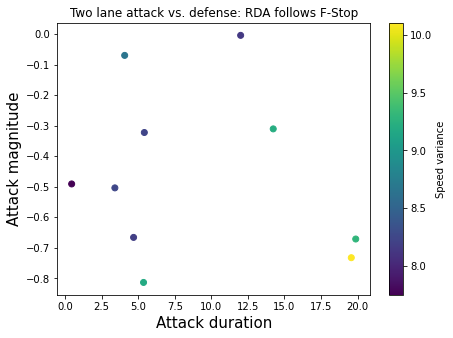

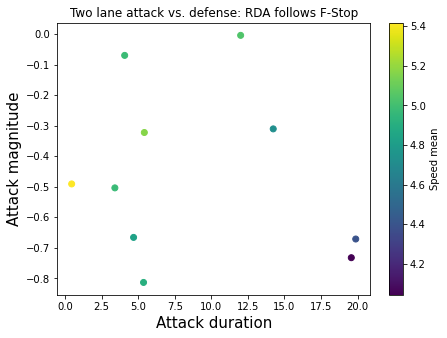

In [13]:
attack_params = np.array(random_sample_attack_params)

plt.figure(figsize=[7,5])
plt.scatter(attack_params[:,0],attack_params[:,1],c=random_sample_speed_vars)
plt.colorbar(label='Speed variance')
plt.ylabel('Attack magnitude',fontsize=15)
plt.xlabel('Attack duration',fontsize=15)
plt.title('Two lane attack vs. defense: RDA follows F-Stop')



plt.figure(figsize=[7,5])
plt.scatter(attack_params[:,0],attack_params[:,1],c=random_sample_speed_means)
plt.colorbar(label='Speed mean')
plt.ylabel('Attack magnitude',fontsize=15)
plt.xlabel('Attack duration',fontsize=15)
plt.title('Two lane attack vs. defense: RDA follows F-Stop')


In [14]:
random_sample_attack_params = []
random_sample_speed_vars = []
random_sample_speed_means = []

def get_speed_var_and_mean(Total_Attack_Duration,attack_decel_rate):
    v_des = 7.0

    try:
        trajectory_dict, emission_path = sim_attack_smoother_general(
            v_des,
            want_render=False,
            num_lanes = 2,
            Total_Attack_Duration = Total_Attack_Duration,
            attack_decel_rate = attack_decel_rate)
        
        speed_var = get_speed_var(trajectory_dict)
        speed_mean = get_speed_mean(trajectory_dict)
    except:
        print('Error with simulation...')
        speed_var = None
        speed_mean = None
        
    return speed_var,speed_mean

        
for i in range(20):
    Total_Attack_Duration = 5.0
    attack_decel_rate = -1.0
    print('Simulation '+str(i))
    speed_var,speed_mean = get_speed_var_and_mean(Total_Attack_Duration,attack_decel_rate)
    if(not speed_var is None):
        random_sample_attack_params.append([Total_Attack_Duration,attack_decel_rate])
        random_sample_speed_vars.append(speed_var)
        random_sample_speed_means.append(speed_mean)
    
print('Simulations finished.')

Simulation 0
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 832.7781741260636
data/ring_variable_cfm_20230121-1753311674345211.557029-0_emission.csv data
Average, std velocities: 4.924321278795612, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 832.7781741260636, 0.0
Total time: 42.38327598571777
steps/second: 55.22414070187205
Data loaded, total time: 2.23673415184021
Simulation 1
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 866.6837100633212
data/ring_variable_cfm_20230121-1754171674345257.902776-0_emission.csv data
Average, std velocities: 5.042745540703892, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 866.6837100633212, 0.0
Total time: 40.529048919677734
steps/second: 58.00263458626183
Data loaded, total time: 1.2332842350006104
Simulation 2
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed.

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 825.6020420355682
data/ring_variable_cfm_20230121-1755001674345300.8742452-0_emission.csv data
Average, std velocities: 4.869433305270228, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 825.6020420355682, 0.0
Total time: 39.150943994522095
steps/second: 58.21280910619969
Data loaded, total time: 1.2328379154205322
Simulation 3
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 859.9680257906366
data/ring_variable_cfm_20230121-1755421674345342.479713-0_emission.csv data
Average, std velocities: 4.98948446634283, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 859.9680257906366, 0.0
Total time: 38.851778745651245
steps/second: 58.42827491334829
Data loaded, total time: 1.7061331272125244
Simulation 4
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. 

Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 831.9024402521662
data/ring_variable_cfm_20230121-1756241674345384.231285-0_emission.csv data
Average, std velocities: 4.894593492809295, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 831.9024402521662, 0.0
Total time: 38.53051805496216
steps/second: 58.995062024687314
Data loaded, total time: 1.4006178379058838
Simulation 5
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 897.4175845117496
data/ring_variable_cfm_20230121-1757051674345425.493037-0_emission.csv data
Average, std velocities: 5.2390185848513875, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 897.4175845117496, 0.0
Total time: 38.73987889289856
steps/second: 58.537990665172295
Data loaded, total time: 1.2212750911712646
Simulation 6
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 839.0719474284158
data/ring_variable_cfm_20230121-1757461674345466.609868-0_emission.csv data
Average, std velocities: 4.849317218726813, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 839.0719474284158, 0.0
Total time: 38.58439898490906
steps/second: 59.020327049435394
Data loaded, total time: 1.223581075668335
Simulation 7
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 779.5540016851172
data/ring_variable_cfm_20230121-1758271674345507.581835-0_emission.csv data
Average, std velocities: 4.721939997307212, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 779.5540016851172, 0.0
Total time: 38.77144122123718
steps/second: 58.594063805649526
Data loaded, total time: 1.228234052658081
Simulation 8
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. 

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 835.2319487021684
data/ring_variable_cfm_20230121-1759081674345548.7360861-0_emission.csv data
Average, std velocities: 4.988686947878927, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 835.2319487021684, 0.0
Total time: 38.54784297943115
steps/second: 58.82986145581428
Data loaded, total time: 1.2179319858551025
Simulation 9
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed.

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 802.9762370296185
data/ring_variable_cfm_20230121-1759491674345589.673398-0_emission.csv data
Average, std velocities: 4.740162937564703, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 802.9762370296185, 0.0
Total time: 38.64280295372009
steps/second: 58.93286672556306
Data loaded, total time: 1.2214388847351074
Simulation 10
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 839.2503732640461
data/ring_variable_cfm_20230121-1800301674345630.706025-0_emission.csv data
Average, std velocities: 4.991780501821993, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 839.2503732640461, 0.0
Total time: 38.460283041000366
steps/second: 58.79274732008044
Data loaded, total time: 1.2000651359558105
Simulation 11
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 832.800246668799
data/ring_variable_cfm_20230121-1801111674345671.526848-0_emission.csv data
Average, std velocities: 5.006765481160697, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 832.800246668799, 0.0
Total time: 38.534059047698975
steps/second: 58.88070887390749
Data loaded, total time: 1.2221229076385498
Simulation 12
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. 

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 835.4412208937246
data/ring_variable_cfm_20230121-1801521674345712.440834-0_emission.csv data
Average, std velocities: 4.94405826220901, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 835.4412208937246, 0.0
Total time: 38.378767013549805
steps/second: 58.90973744743036
Data loaded, total time: 1.2062137126922607
Simulation 13
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed.

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 850.5308999081169
data/ring_variable_cfm_20230121-1802331674345753.19278-0_emission.csv data
Average, std velocities: 5.032848506884635, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 850.5308999081169, 0.0
Total time: 38.58128881454468
steps/second: 58.66393222495463
Data loaded, total time: 1.3795101642608643
Simulation 14
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 833.1221704359052
data/ring_variable_cfm_20230121-1803141674345794.3188028-0_emission.csv data
Average, std velocities: 4.947302529636423, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 833.1221704359052, 0.0
Total time: 38.62685489654541
steps/second: 58.67395185266985
Data loaded, total time: 1.2220208644866943
Simulation 15
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 851.0594261305619
data/ring_variable_cfm_20230121-1803551674345835.324558-0_emission.csv data
Average, std velocities: 5.040536411870868, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 851.0594261305619, 0.0
Total time: 38.63178205490112
steps/second: 58.822562737904676
Data loaded, total time: 1.208460807800293
Simulation 16
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_0 is greater than safe speed.

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 799.0132855006751
data/ring_variable_cfm_20230121-1804361674345876.348823-0_emission.csv data
Average, std velocities: 4.701941339221479, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 799.0132855006751, 0.0
Total time: 38.32651710510254
steps/second: 59.19150077652206
Data loaded, total time: 1.2039189338684082
Simulation 17
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 808.89575519392
data/ring_variable_cfm_20230121-1805171674345917.041305-0_emission.csv data
Average, std velocities: 4.807217560817703, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 808.89575519392, 0.0
Total time: 38.75742292404175
steps/second: 58.48972865835977
Data loaded, total time: 1.212981939315796
Simulation 18
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 807.6388678521027
data/ring_variable_cfm_20230121-1805581674345958.168372-0_emission.csv data
Average, std velocities: 4.831634418684031, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 807.6388678521027, 0.0
Total time: 38.93367314338684
steps/second: 58.42219517943151
Data loaded, total time: 1.2041728496551514
Simulation 19
Number of classes of driver: 78
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_7.0_1 is greater than safe speed.

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 836.3636108789133
data/ring_variable_cfm_20230121-1806391674345999.464028-0_emission.csv data
Average, std velocities: 4.954414585738459, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 836.3636108789133, 0.0
Total time: 38.49760293960571
steps/second: 58.86447013001758
Data loaded, total time: 1.1957461833953857
Simulations finished.


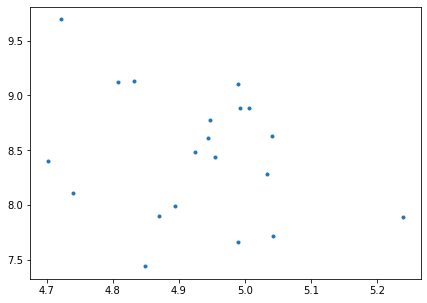

In [17]:
plt.figure(figsize=[7,5])
plt.plot(random_sample_speed_means,random_sample_speed_vars,'.')